In [25]:
#@title Установка необходимых библиотек
#@

# ! pip install loguru # вспомогательная для rubrix
# ! pip install rubrix # для работы с инструментом разметки rubrix
! pip install transformers # для создания и обучения нейросетей 
! pip install datasets # для подготовки данных для нейросети 
! pip install transformers_interpret # для интерпретации обученных нейросетей

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#@title Загрузка библиотек

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from datasets import Dataset, DatasetDict, ClassLabel
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments






In [4]:
df = pd.read_excel('df_majority.xlsx')
df = df.rename(columns={'sexist_binary': 'label'}) # переименовываем колонки
df = df[['text', 'label']] # оставляем в таблице только колонки текста и метки
df



,text,label
0,MENTION3111 MENTION3424 ladyboner deserves so ...,False
1,All my sons have grown up with computer games ...,True
2,"Woman are the future. Rise up, Stand up, Shine...",False
3,Women have more intuition than men.,True
4,"Lo cewek ya? ""MENTION4162: I have zero toleran...",False
...,...,...
3374,"As head of the household, the father should ha...",True
3375,MENTION301 The idea...or the argument?,False
3376,Is 5'8 tall for a girl??,False
3377,i eat like a man its old news😂 https://t.co/Vb...,True


In [5]:
#@title Распределение тем 

df['label'].value_counts() # смотрим сколько твитов по лейблам



True     1764
False    1615
Name: label, dtype: int64

In [6]:
#@title Подготовка данных для обучения

# указываем имя нейросети, которое будем использовать
MODEL_NAME = 'distilbert-base-multilingual-cased' #@param {type:"string"} 
# uncase не учитывает регистр

# %%
ds = Dataset.from_pandas(df) # преобразуем таблицу в набор данный, пригодный для обучения нейросети 

number_classes = 2
names = df['label'].unique().tolist()
ds = ds.cast_column('label', ClassLabel(number_classes, names))
ID2LABEL = {i: ds.features['label'].int2str(i) for i in range(number_classes)}
LABEL2ID = {ds.features['label'].int2str(i): i for i in range(number_classes)}


# разделяем данные 
dt = ds.train_test_split(test_size=0.2, stratify_by_column="label", seed=10)


tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length")

tokenized_datasets = dt.map(tokenize_function, batched=True)
tokenized_datasets



Casting the dataset:   0%|          | 0/4 [00:00<?, ?ba/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2703
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 676
    })
})

In [ ]:
print(tokenize_function(tokenized_datasets["train"][:2])) 


{'input_ids': [[101, 108, 54198, 11273, 47430, 77261, 52980, 11305, 103450, 146, 50725, 85467, 113, 10117, 41163, 114, 10111, 25188, 48742, 10111, 21964, 10105, 11897, 119, 85467, 10124, 169, 12947, 11195, 26767, 10108, 11424, 10479, 10944, 112, 188, 14125, 76281, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [7]:
#@title Подготовка обучения: настройка параметров обучения 

# model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, label2id=LABEL2ID, id2label=ID2LABEL)
model = AutoModelForSequenceClassification.from_pretrained("5-epoch-multi")


training_args = TrainingArguments(
    output_dir='./results',          # директория с результате обучения
    num_train_epochs=5,              # количество эпох
    per_device_train_batch_size=16,  # количество примеров в одной итерации обучения
    per_device_eval_batch_size=16,   # количество примеров в одной итерации проверки
    warmup_steps=500,                # количество итераций за которое lr дойдет с 0 до выбранного нами 
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # директория для логгов
    logging_steps=50,                # частота логгирования
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='micro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


trainer = Trainer(
    model=model,                                         # созданная нейросеть
    args=training_args,                                  # параметры тренировки, указанные выше
    train_dataset=tokenized_datasets['train'],           # набор данных для тренировки
    eval_dataset=tokenized_datasets['test'],             # набор данных для контроля
    compute_metrics=compute_metrics
)



In [ ]:
#@title Запуск обучения
trainer.train()


The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2703
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 845
  Number of trainable parameters = 135326210


Step,Training Loss
50,0.047800
100,0.054000
150,0.078000
200,0.063100
250,0.054400
300,0.082900
350,0.081000
400,0.083800
450,0.115100
500,0.099300


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=845, training_loss=0.07056761697904598, metrics={'train_runtime': 633.9071, 'train_samples_per_second': 21.32, 'train_steps_per_second': 1.333, 'total_flos': 1790296892835840.0, 'train_loss': 0.07056761697904598, 'epoch': 5.0})

In [ ]:
#@title Оценка результатов
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 676
  Batch size = 16


{'eval_loss': 1.2116098403930664,
 'eval_accuracy': 0.7988165680473372,
 'eval_f1': 0.7988165680473372,
 'eval_precision': 0.7988165680473372,
 'eval_recall': 0.7988165680473372,
 'eval_runtime': 11.4209,
 'eval_samples_per_second': 59.19,
 'eval_steps_per_second': 3.765,
 'epoch': 5.0}

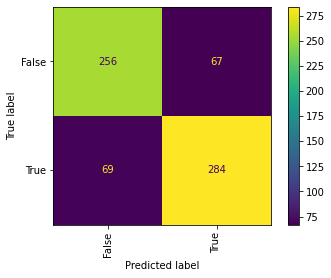

In [11]:
#@title Матрица ошибок
import torch
import torch.nn.functional as F
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

val_texts = dt['test']['text']
val_labels = dt['test']['label']


 
y_preds = []
y_trues = []
for index, val_text in enumerate(val_texts):
    tokenized_val_text = tokenizer([val_text], 
                                    truncation=True,
                                    padding=True,
                                    return_tensors='pt').to(device)
    outputs = model(**tokenized_val_text)

    prediction = F.softmax(outputs.logits, dim=1)
    y_pred = ID2LABEL[int(torch.argmax(prediction).cpu().numpy())]
    y_true = ID2LABEL[val_labels[index]]
    y_preds.append(y_pred)
    y_trues.append(y_true)

disp = ConfusionMatrixDisplay.from_predictions(y_trues, y_preds,
                               display_labels=list(ID2LABEL.values()), xticks_rotation='vertical')


In [ ]:
#@title Сохранение дообученной нейросети

trainer.save_model('5-epoch-multi')

Saving model checkpoint to /content/drive/MyDrive/Неравенства проект/5-epoch-multi
Configuration saved in /content/drive/MyDrive/Неравенства проект/5-epoch-multi/config.json
Model weights saved in /content/drive/MyDrive/Неравенства проект/5-epoch-multi/pytorch_model.bin


In [1]:
#@title Интерпретация обученной нейросети
from transformers_interpret import SequenceClassificationExplainer, ZeroShotClassificationExplainer


cls_explainer = SequenceClassificationExplainer(
    model,
    tokenizer)


text = "\u041C\u0435\u0441\u0442\u043E \u0436\u0435\u043D\u0449\u0438\u043D\u044B \u043D\u0430 \u043A\u0443\u0445\u043D\u0435" #@param {type: "string"}


labels = list(ID2LABEL)
class_name = "True" #@param [True, False] {type:"string"}


word_attributions = cls_explainer(text.lower(), class_name=class_name, embedding_type=0,
                    internal_batch_size=1)
# word_attributions
cls_explainer.visualize()

ModuleNotFoundError: ignored

Проверяем, как классифицирует модель на случайной размеченной выборке из нашего датасета с комментариями.

In [12]:
from transformers import TextClassificationPipeline

pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, device=device)

yt_df = pd.read_csv('women_random.csv', encoding="utf-8")
yt_texts = yt_df['text'].tolist()

predictions = pipe(yt_texts, return_all_scores=False, padding=True, truncation=True)


/usr/local/lib/python3.8/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Disabling tokenizer parallelism, we're using DataLoader multithreading already


In [16]:
preds_df = pd.DataFrame(predictions)
preds_df.join(yt_df, rsuffix='_orig')[preds_df['label'] == 'True']['text'].tolist()

['А есть возможность скачать ноутбук?',
 'Очень часто одно из требований у работодателей - это бакалавр в комп науках. Не видела вакансий без бакалавра',
 'я так скучала, спасибо за это видео и живое ощущение. ты лучшая. смотря на тебя, хочется жить',
 'Даша, классные видео! Но твои видео поддерживают прокрастинацию у других людей вроде меня) В моменты когда ты закрываешь пол минуты программы на своем компе и рассказываешь про Cmd+Q, я не понимаю почему я на твоем канале и продолжаю смотреть) Тем не менее спасибо за то, что ты снимаешь. З.Ы. Футболка забавная',
 'Тон немножко не твой, кожа прям выбеленная \r\r\n\r\r\n(Вычленила она из оч крутого видео одну пустяковую фигню ??)',
 '10 дней отпуска, вообще не серьезно.',
 'Почему финансы - это "сфера ответственности" мужчины? Уверенность в себе не должна зависеть от того, зарабатываешь ты больше своего партнера или нет. Пол здесь роли не играет. А забота выражается уж точно не через финансы.',
 'я могу претендовать на голубую карту, тут 

In [20]:
len(preds_df.join(yt_df, rsuffix='_orig')[preds_df['label'] == 'True']['text'].tolist())

24

In [19]:
display(yt_df[yt_df.label == True])

,Unnamed: 0,...1,id,text,video_id,label
4,5,5,Ugw8xeiFmti1ixr71Tx4AaABAg,У меня всего один вопрос: где мне найти такую ...,5,True
31,32,32,UgxGuF4oxbFIiW9cDel4AaABAg,Оденься сначала,14,True
34,35,35,UgywQ213KB7v8bE4b4p4AaABAg,"приезжай, Малышка, ко мне. попитоним вместе!",16,True
38,39,39,UgzoI_7IcUcMggHMNuV4AaABAg,"Ну, вот. А говорят, что красивые девушки не бы...",17,True
45,46,46,UgxfNoKh_hqs3uLKkHx4AaABAg,Программировать нужно учиться на чужом коде. Н...,18,True
50,51,51,UgxPXOgAxZbKeXPfkjF4AaABAg,"Женщина -программист? Ты че, прикалываешься?",21,True
63,64,64,UgzFkXjRWREjVfg_Mep4AaABAg,"Вика, очень клевый звук и монтаж, прямо-таки д...",26,True
64,65,65,UgxCrT_LHmAk5jrxTMx4AaABAg,нет слов\r\r\n одни эмоции \r\r\nне зря я не б...,27,True
68,69,69,UgwJLio_yCNeU2NVV254AaABAg,баба в айти как мужик генеколог,28,True
75,76,76,UgxUdDgT97CPkRttvLN4AaABAg,девушка кодер да еще и дотер (может вообще сид...,29,True


In [29]:
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, device=device)

yt_df = pd.read_csv('w_p_en_samples.csv', encoding="utf-8")
yt_texts = yt_df['text'].tolist()

predictions = pipe(yt_texts, return_all_scores=False, padding=True, truncation=True)


In [30]:
preds_df = pd.DataFrame(predictions)
preds_df.join(yt_df)[preds_df['label'] == 'True']['text'].tolist()

['Mam you are the best teacher I have ever learnt from',
 'Too Good..thankew so much mam...mam please make video on how to calculate time complexity of any algorithm...',
 'Mam can you make video on Graph(Computer Science)?',
 "Does everyone eat in front of computer desk ? I mean you guys don't have a particular place/restaurant to sit and have a lunch time? Thank you !",
 'of course she looks at the indian guy at "team chai time"',
 "when you go to the bathroom there must be a smell jajajajaajaja and that's it",
 'She cute',
 'You get to eat free food at your job?!!! Maybe I should change my degree plan from Finance to Computer Science.',
 'Day in the life of a professional eater.',
 'FOOD ENGINEER',
 'Idk if I should do this major . It scares me loll . Please some advice',
 'lol so saw it for a min then look up that gat song N naaaa. theres a reason y the dogs out is a meme, for old people yea but still a meme',
 'I dont usually comment on youtube videos but as a black woman thats le

In [31]:
len(preds_df.join(yt_df)[preds_df['label'] == 'True']['text'].tolist())

106

In [32]:
yt_df = pd.read_csv('w_ds_en_samples.csv', encoding="utf-8")
yt_texts = yt_df['text'].tolist()

predictions = pipe(yt_texts, return_all_scores=False, padding=True, truncation=True)

preds_df = pd.DataFrame(predictions)
preds_df.join(yt_df)[preds_df['label'] == 'True']['text'].tolist()


/usr/local/lib/python3.8/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


["I'm new here, and learning logics and algorithm yet, but woul love to see more projects, for newbies, intermediate e advanced coders... I knew I have to practice a lot to become good.",
 'hey please,teach us machine learning or how to do projects live to get idea',
 "0:27 this was not your daughter, right? She looks like a mannequin or typical teenager who doesn't like to hug mom 😜",
 "can't complain!",
 'So analyst job at Google is basically drinking coffee and eating',
 'Can a mechanical engineer be a data scientist???',
 'I really wonder how much do you earn. Cuz it seems like you do a loooott of job.',
 "Hi. Maybe you can give me a few tips to find a job. I'm from Ukraine and in the US it so different",
 'THANKS',
 "I'm an administrative assistant supervisor for a federal agency going on 8 years. I hate it. Feels like the biggest waste of my time and energy because we lack the tools you would think an organization like that would have to help manage data and the piles of paperwor

In [33]:
len(preds_df.join(yt_df)[preds_df['label'] == 'True']['text'].tolist())

108

In [35]:
yt_df = pd.read_csv('m_ds_en_samples.csv', encoding="utf-8")
yt_texts = yt_df['text'].tolist()

predictions = pipe(yt_texts, return_all_scores=False, padding=True, truncation=True)

preds_df = pd.DataFrame(predictions)
preds_df.join(yt_df)[preds_df['label'] == 'True']['text'].tolist()


["3:24 oh sshiiiit u better not stepping over barbell it's taboo for athletes in russia",
 "Great! We don't take a shower after waking up!",
 'All coders don’t shower 😳😳😳',
 '"Go eat out because I can\'t get a wife."',
 '70% of people find their crushes/fiancees/future wifes during their college years.',
 '3:30-4:00 Stared at the screen and did nothing.. this is all of us!',
 'I do employer works during the day. And my clients work at night. Soo..',
 'Your peluche is spectacular!!!! I love it!!!',
 "If someone noticed at 2:12, 'watch some shitty videos', the person on the screen if someone knows! LOL Joma is so smart!",
 'YOUR LISTENING TWICE AND YOU LIKE TECHNOLOGY WE FOUNG THE PERFECTION',
 "u need a GF or u'll burn out ! Nice life buddy i'm jealous keep it up",
 'You have very good photography skills keep up',
 'Why do you turn off your monitor?',
 'Your video is rather too fast, quite unclear and the cursor is not curatively precise.',
 'I have been on a hunt to figure out how many

In [36]:
len(preds_df.join(yt_df)[preds_df['label'] == 'True']['text'].tolist())

89

In [37]:
yt_df = pd.read_csv('m_p_en_samples.csv', encoding="utf-8")
yt_texts = yt_df['text'].tolist()

predictions = pipe(yt_texts, return_all_scores=False, padding=True, truncation=True)

preds_df = pd.DataFrame(predictions)
preds_df.join(yt_df)[preds_df['label'] == 'True']['text'].tolist()


["All that brain and still reaching for low hanging fruit. Hope you can get off YT man. 100% oversaturated. So's the teach to code market.",
 'Hello! I am 16 years old and I just started to explore coding, basic htmls and stuff. I was wondering If I go to college and apply for computer science, do you think I will have a hard time since I only know little information about programming? Thank you :)',
 'You play minecraft? Gamers rise up and salute this man!',
 'I dont have anyone else to talk to so i wish someone will reply i started learning back end this year but i think that im not that good at programming and sometimes i think i should change my profession and im so demotivated can someone pls help me i need help im going on a mental breakdown',
 "I wasn't a kid, but I learned basic HTML using MySpace also. In 2019, I quit my 5-year job to do a full-time coding bootcamp (in person) and, man, I sucked at that. Failure shook me, and I'm still building myself back up to try relearning

In [38]:
len(preds_df.join(yt_df)[preds_df['label'] == 'True']['text'].tolist())

92

In [39]:
yt_df = pd.read_csv('w_p_ru_samples.csv', encoding="utf-8")
yt_texts = yt_df['text'].tolist()

predictions = pipe(yt_texts, return_all_scores=False, padding=True, truncation=True)

preds_df = pd.DataFrame(predictions)
preds_df.join(yt_df)[preds_df['label'] == 'True']['text'].tolist()


['очень полезно!спасибо👍🏼👌🏼классные волосы)👌🏼 и отличный адекватный блогер)👍🏼👌🏼 неужели не нужны разработчики и дизайнеры игр и кино кто разрабатывает рисует?🤔 а в США Европе Азии? подскажите пожалуйста !а для открытия СВОЕГО мультимедиа диджитал СТАРТАПА и востребованны ли такие ПРОФЕССИИ: разработка игр unity, unriil, C++, С#, или 3D анимация, motion design?) CG VFX спецэффекты ДЛЯ КИНО?рекламы клипов А VR AR?! для игр. И ИИ ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ?🤔и кстати! где университет, преподаватели помогают открыть стартап, или найти инвесторов?☝🏼благодарю!🙏',
 'Добрый день! Моя сестра учится в Германии на медика. Она хочет ещё поступить в вуз по IT в Москву на дистанционное обучение .Что вы посоветуете, какой вуз выбрать и какой факультет ?',
 'Умничка. Таких хороших обзоров мало. Четко, кратко, лаконично, без воды, приятно слушать. "Комсомолка, спортсменка и т.д."',
 'Круто посидели поболтали, было приятно наблюдать =) Якиманка осталась не тронутой страной с красным пятном на полотне!',
 'з

In [40]:
len(preds_df.join(yt_df)[preds_df['label'] == 'True']['text'].tolist())

181

In [41]:
yt_df = pd.read_csv('women_ru_ds.csv', encoding="utf-8")
yt_texts = yt_df['text'].tolist()

predictions = pipe(yt_texts, return_all_scores=False, padding=True, truncation=True)

preds_df = pd.DataFrame(predictions)
preds_df.join(yt_df)[preds_df['label'] == 'True']['text'].tolist()


['Я так понимаю математика у вас на хорошем уровне. Спасибо за видео, отличное видео, хоть я не датасайнтист.',
 'Как мужчина не смог спокойно смотреть и, к сожалению, ничего не понял.',
 'я правильно понимаю, что раньше это называлось социологией?',
 'А есть возможность скачать ноутбук?',
 'Какой бред. Девочка умеет только либы импортить',
 'Вы забыли про биннинг переменных, psi, woe. Если не смотреть эти штуки, модель может развалится на продакте через 3 месяца. А так прикольно, спасибо! Где было это видео, когда я писал диплом?))',
 'спасибо большое, принцесса. I learn thanks to your classes, take care of yourself💕',
 'Несите кольцо!!1 Я знал что девушки могут быть умными, но это какой-то космический уровень.',
 'А можете скинуть гитхаб, пожалуйста',
 'Куда податься хз....',
 'Я кардиохирург с 10 летним стажем ( и учебой минимум 10 лет) и сегодня мою зарплату в бюджетной больнице снизили до 100 т р. так что начало ролика порадовало. Не зря купил курс в geek brains. Ну а вы, друзья с

In [42]:
len(preds_df.join(yt_df)[preds_df['label'] == 'True']['text'].tolist())

114